In [1]:
# Preamble

from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

In [34]:
import sys
sys.path.append('../../../astro_codes/')

In [2]:
samples = Table.read('../matched_fits/samples.fits')
gas_samples = Table.read('../matched_fits/gas_samples.fits')
nsa_data = Table.read('../matched_fits/nsa_matched.fits')
chang_data = Table.read('../matched_fits/chang_out_matched.fits')
a70_data = Table.read('../matched_fits/a70_matched.fits')
print('Loaded galaxy data')

Loaded galaxy data


In [7]:
redshift = nsa_data['Z']
M_r = nsa_data['M_corrected'][:,4]
mass = chang_data['lmass50_all']
gas_mass = a70_data['loghimass']

In [8]:
def box(xlimits,ylimit,color='k',linestyle='solid',linewidth=2,zorder=0,
        label=None):

    xmin, xmax, ymin, ymax = plt.axis()
    plt.vlines(xlimits[0],ylimit,ymax,zorder=zorder,label=label,
               color=color,linestyle=linestyle,linewidth=linewidth)
    plt.hlines(ylimit,xlimits[0],xlimits[1],zorder=zorder,
               color=color,linestyle=linestyle,linewidth=linewidth)
    plt.vlines(xlimits[1],ylimit,ymax,zorder=zorder,
               color=color,linestyle=linestyle,linewidth=linewidth)
    return None


def plot_subset(x,y,color='k',alpha=0.75,s=6,N=100,rasterized=True,zorder=0,label=None):
    np.random.seed(0)
    subset = np.append(np.ones(N),np.zeros(len(y)-N)).astype(bool) # select only N galaxies
    print(len(x),len(y),len(subset))
    np.random.shuffle(subset)
    _ = plt.scatter(x[subset],y[subset],color=color,alpha=alpha,s=s,
                    zorder=zorder,rasterized=rasterized,label=label)
    return None

In [52]:
gas_samples.colnames

['has_a70',
 'in_mass_limit',
 'in_vmax_limit',
 'vmax_weighting',
 'vmax_both',
 'vmax_weighting_both']

In [53]:
in_redshift = samples['in_redshift']
in_a70 = (gas_samples['has_a70']) & (samples['in_redshift'])

N_full = [in_redshift,in_redshift,in_a70]
N_sample = [(in_redshift) & (samples['in_lum_limit']),
            (in_redshift) & (samples['in_mass_limit']),
            (in_a70) & (gas_samples['in_mass_limit'])]

In [67]:
from alfalfa_conversions import distance_from_redshift
from luminosities_magnitudes_and_distances import mag_to_Mag
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # 737 cosmology

def mag_to_Mag(mag,z):
    D = cosmo.luminosity_distance(z).to(u.pc)
    Mag = mag - 5*(np.log10(D.value)-1)
    return Mag

def mass_limit(z):
    return 2.17*np.log10(z) + 12.74

def gas_mass_limit(z):
    D = distance_from_redshift(z)
    return np.log10((0.72*2.356e5)*D**2)

def Mag_limit(z):
    return mag_to_Mag(17,z)

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


46319 46319 46319
46319 46319 46319
4344 4344 4344


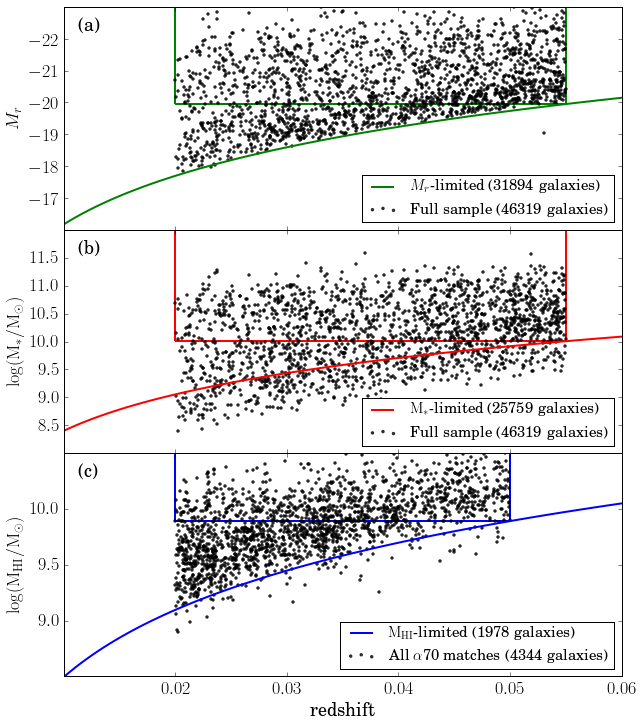

In [69]:
fig, axarr = plt.subplots(3,1,figsize=(10,12),sharex=True,sharey=False)
plt.subplots_adjust(hspace=0,wspace=0)
axarr[-1].set_xlim(0.01,0.06)
x_guide = np.linspace(0.01,0.06,100)

figlabels = 'abc'
ylabels = ['$M_r$','$\mathrm{\log(M_*/M_\odot)}$','$\mathrm{\log(M_{HI}/M_\odot)}$']
colors = 'grb'
for a, ax in enumerate(axarr):
    ax.text(0.025,0.95,'({})'.format(figlabels[a]),
            ha='left',va='top',transform=ax.transAxes)
    ax.set_ylabel(ylabels[a])
axarr[-1].set_xlabel('redshift')

xbox_limits = ((0.02,0.055),(0.02,0.055),(0.02,0.05))
ybox_limits = (-19.95,10.01,9.89)
y_lims = ((-16,-23),(8,12),(8.5,10.5))

boxlabels = ['$M_r$-limited','$\mathrm{M_*}$-limited','$\mathrm{M_{HI}}$-limited']
dotlabels = ['Full sample','Full sample',r'All $\alpha$70 matches']

masks = [in_redshift,in_redshift,in_a70]
variables = [M_r,mass,gas_mass]

y_guides = [eq(x_guide) for eq in [Mag_limit,mass_limit,gas_mass_limit]]

for a, ax in enumerate(axarr):
    
    x, y = redshift[masks[a]], variables[a][masks[a]]
    
    plt.sca(ax)
    ax.set_ylim(y_lims[a])
    box_label = '{} ({} galaxies)'.format(boxlabels[a],np.sum(N_sample[a]))
    dot_label = '{} ({} galaxies)'.format(dotlabels[a],np.sum(N_full[a]))
    box(xbox_limits[a],ybox_limits[a],color=colors[a],label=box_label)
    plot_subset(x,y,N=2000,s=6,label=dot_label)
    plt.plot(x_guide,y_guides[a],color=colors[a],linewidth=2)
    ax.legend(fontsize=15,loc='lower right')

plt.savefig('samples.pdf')